### PROBLEM
One ecommerce company has a project on predicting churned users in order to offer potential
promotions.
An attached file is the dataset that is offered by the company (churn_predict.csv). You will using
these dataset to answer below questions:
1. What are the patterns/behavior of churned users? What are your suggestions to the
company to reduce churned users.
2. Build the Machine Learning model for predicting churned users.

### Step 1: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('churn_prediction.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


### Step 2: Data Exploration

In [4]:
# Dataset Statistic
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### There are 5630 observations in total and some of the features have missing values. The missing values or the outliers need to be removed.

In [6]:
#CustomerID need to be removed as it does need to be used for this purpose
df.drop('CustomerID', axis=1, inplace=True) #set inplace true to reflect the change on original dataframe.

### Step 3: Cleaning Data

#### Handling Outliers

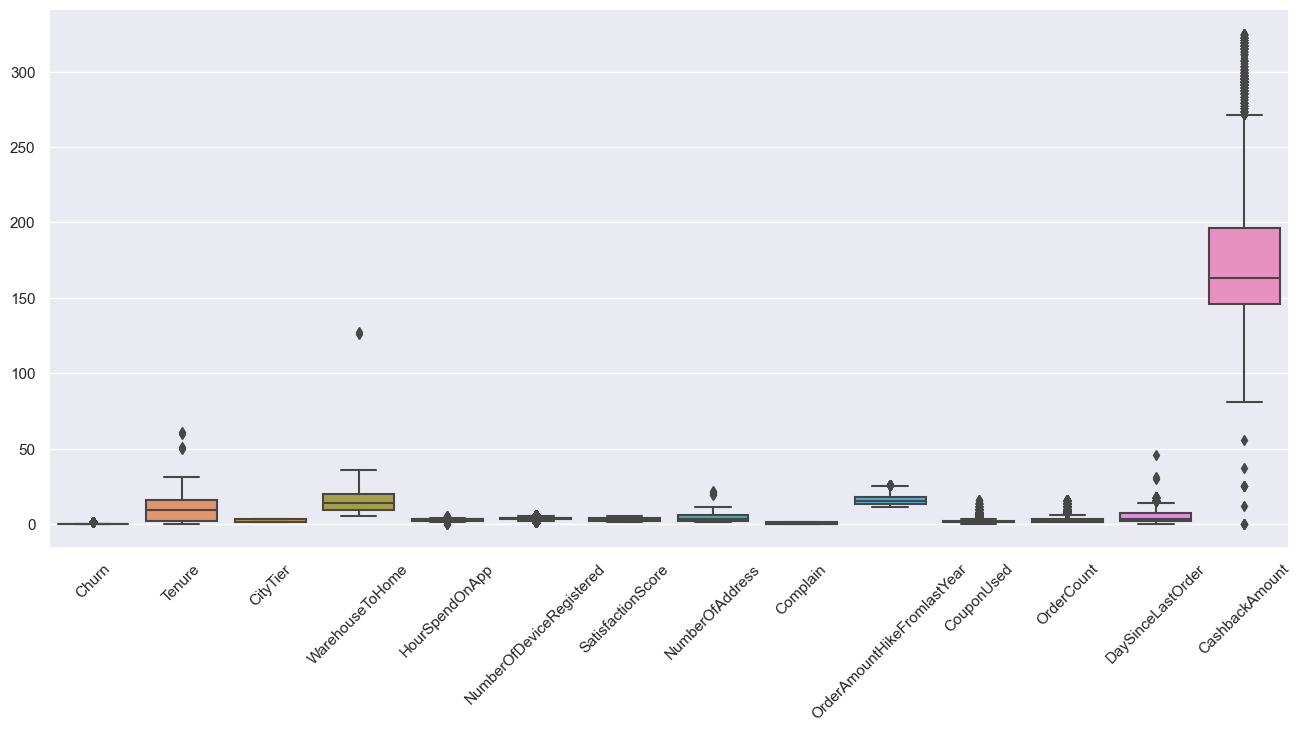

In [7]:
sns.set(style='darkgrid', palette='muted') 
#This line sets the style of the plot to 'darkgrid' and the color palette to 'muted'.
fig, ax = plt.subplots(figsize=(16,7)) 
#: This line creates a figure and axes object with a specific size of 16x7 inches for the plot.
sns.boxplot(data=df)
#This line generates a boxplot using the data from the DataFrame 'df'.
plt.xticks(rotation=45)
# This line rotates the x-axis labels by 45 degrees for better readability.
plt.show()

#### We will use a quantile based flooring method to treat outliers. As per the method, any value beyond 1.5*Q1 and 1.5*Q3 will be regarded as outliers, and all the outlier values will be replaced by Q1-1.5*Q1 and Q3+1.5*Q3.

In [8]:
cat = df.select_dtypes(include='object').columns 
#This line selects columns with object data type (categorical columns) from the DataFrame 'df'
num = list(df.select_dtypes(exclude='object').columns) 
#This line selects columns with numerical data type from the DataFrame 'df' and stores them in a list.
num.remove('Churn')
#This line removes the 'Churn' column from the list of numerical columns
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    #Calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the column.
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    #Calculates the lower limit (lr) and upper limit (ur) for outlier detection using the IQR method.
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )
    #Replaces values below lr with lr and values above ur with ur in the column

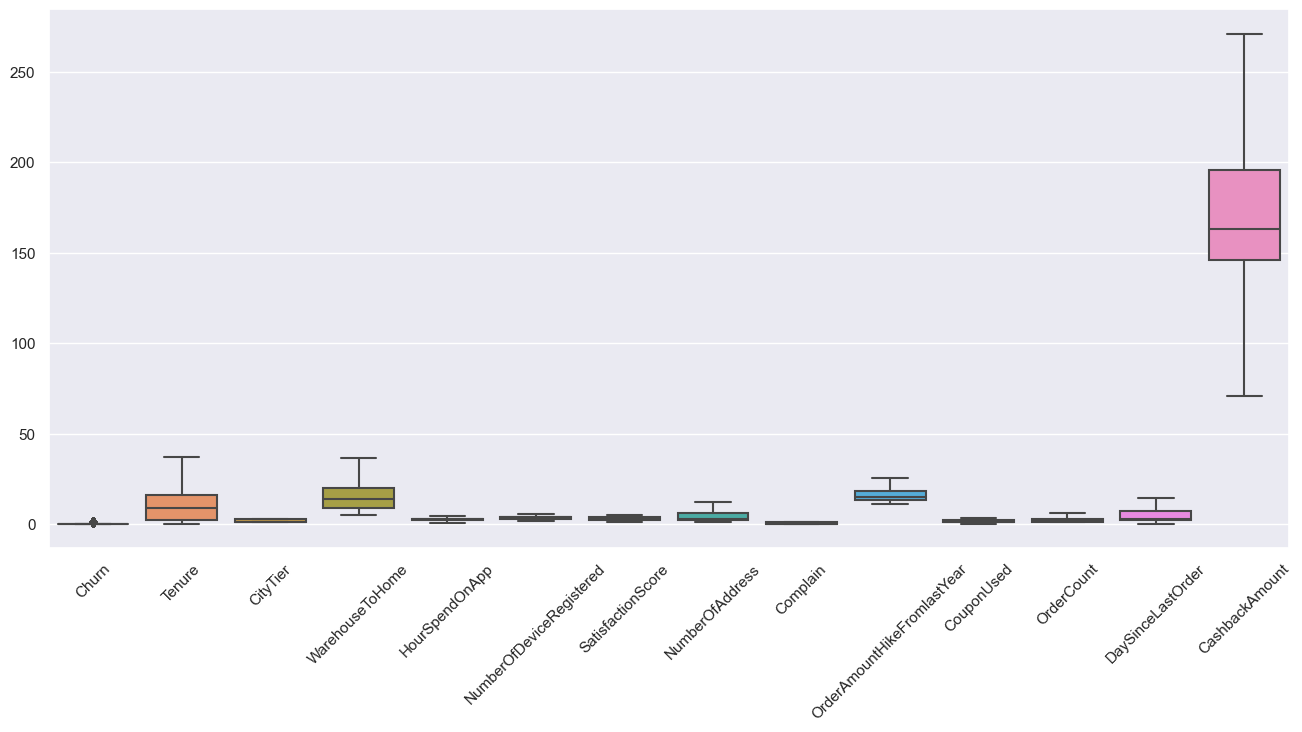

In [9]:
sns.set(style='darkgrid', palette='muted') 
#This line sets the style of the plot to 'darkgrid' and the color palette to 'muted'.
fig, ax = plt.subplots(figsize=(16,7)) 
#: This line creates a figure and axes object with a specific size of 16x7 inches for the plot.
sns.boxplot(data=df)
#This line generates a boxplot using the data from the DataFrame 'df'.
plt.xticks(rotation=45)
# This line rotates the x-axis labels by 45 degrees for better readability.
plt.show()

#### Handling Missing Values

In [10]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
#impute with simple medians.
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df.OrderAmountHikeFromlastYear.median(), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [12]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Step 4: Data Analysis

#### The aim is to analyse and find out patterns specific to a single variable.

#### Categorical variables

In [13]:
# Look into the categorical variables and the frequency of each value
for col in cat:
    print(df[col].value_counts())

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


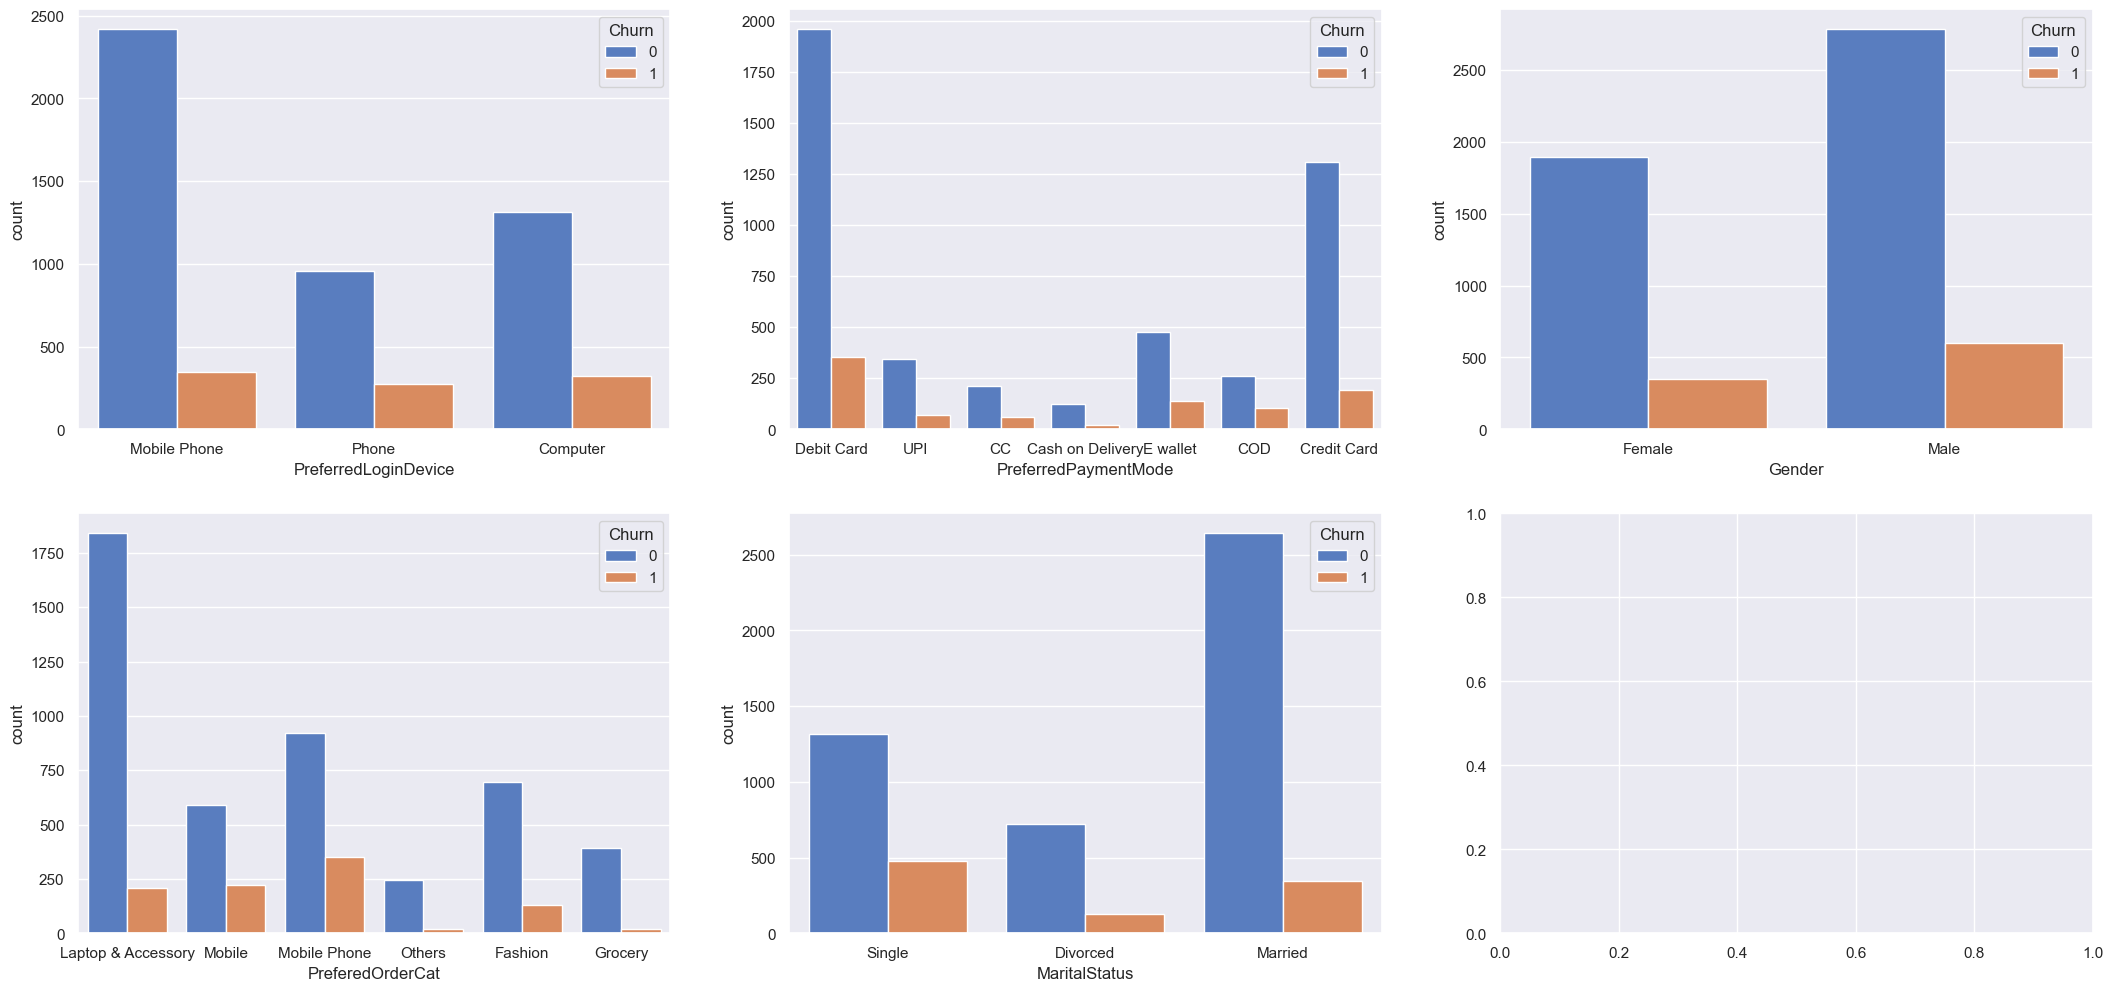

In [14]:
# visualise each variable with their corresponding churn value
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
# This line creates a figure and a grid of subplots with 2 rows and 3 columns, totaling 6 subplots. 
# The `fig` variable represents the entire figure, while `ax` is an array of axes representing each subplot.
for col,subplot in zip(cat, ax.flatten()):
# This line iterates over each categorical column 'col' in the list 'cat' 
# Its corresponding subplot 'subplot' in the flattened array of axes. 
# 'cat' likely contains the names of categorical columns in the DataFrame.
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

#### Numerical variable

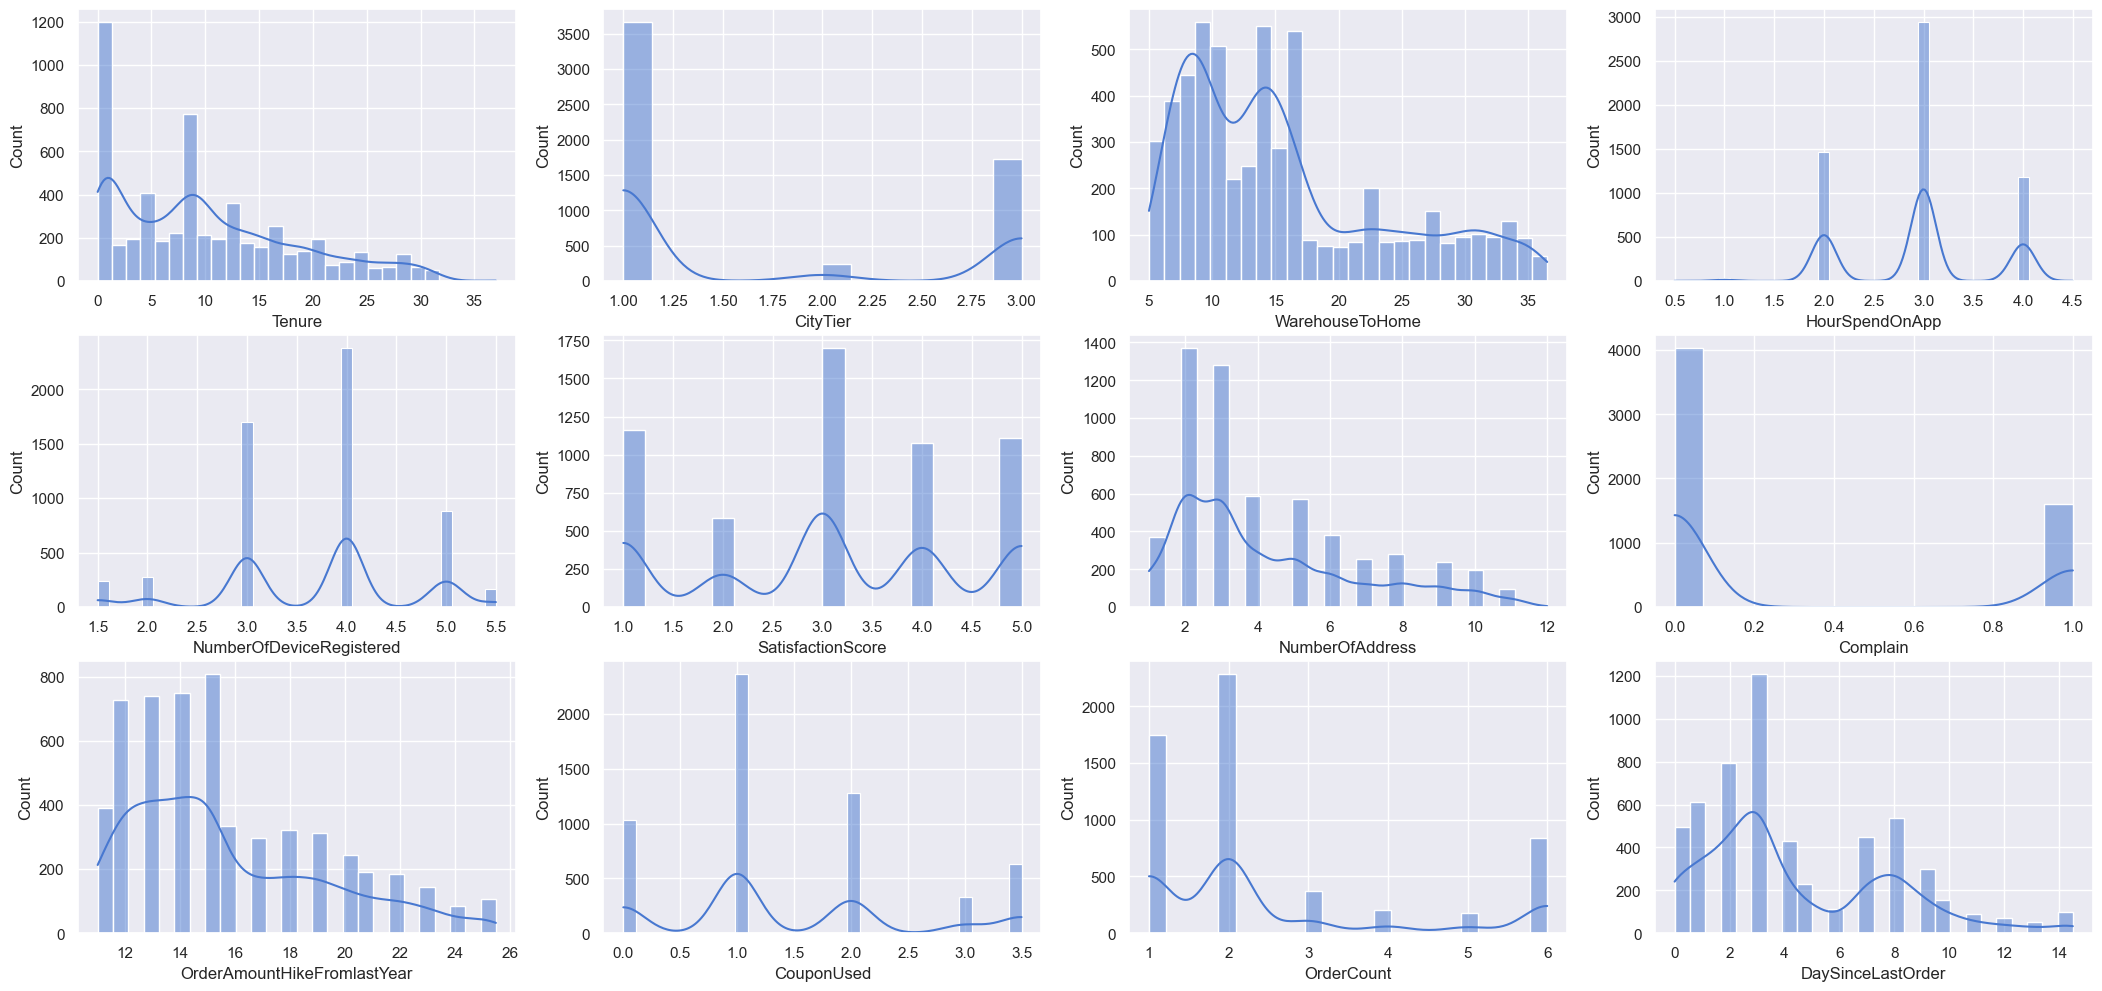

In [15]:
#Visualise distributions
fig,ax = plt.subplots(nrows=3,ncols=4,figsize=(26,12)) # 3 rows, 4 col = 12 subplots
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], kde = True, ax=subplot)

### Step 5: Classification
##### We will be using multiple classification algorithms and find out the best fitting algorithm using the sci-kit learns pipeline and GridsearchCV

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [17]:
#We have several variables with categorical values so we will encode them before feeding them to the algorithms.
enc = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which is used for encoding categorical labels with numerical values.
for col in df.select_dtypes(include='object'):
# This loop iterates over each column in the DataFrame (df ) that has data type 'object', which typically corresponds to categorical variables.
    df[col]=enc.fit_transform(df[col])
# For each categorical column selected, the fit_transform method of the LabelEncoder is called to encode the column into numerical values. 
# The original categorical values in the column are replaced by their corresponding encoded numerical values.

In [18]:
# Splitting the data into train and test sets
X_train, X_test,y_train, y_test = train_test_split(df.drop('Churn', axis=1), df.Churn)

In [33]:
# We will now construct a custom switcher class which will be able to work for any estimator passed through GridsearchCV.
class my_classifier(BaseEstimator,):
# This class is defined with BaseEstimator as the base class, which is a base class for all estimators in scikit-learn that provides basic functionality such as get_params and set_params
    def __init__(self, estimator=None):
        self.estimator = estimator
#The constructor method initializes an instance of my_classifier with an optional estimator parameter. This estimator parameter is the model that will be wrapped by the my_classifier .
    def fit(self, X, y=None):
#This method fits the wrapped estimator to the input data X and target y . It delegates the fitting process to the fit method of the underlying estimator.
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
#This method makes predictions using the wrapped estimator on the input data X . It delegates the prediction process to the predict method of the underlying estimator.
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
#This method is specifically for classifiers. It predicts class probabilities for the input data X using the wrapped estimator.
        return self.estimator.predict_proba(X)
    def score(self, X, y):
#This method calculates the score of the wrapped estimator by comparing the predicted values with the true target values y on the input data X
        return self.estimator.score(X, y)

In [20]:
# we will define our pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('clf', my_classifier())])

In [21]:
pip install xgboost

In [22]:
#Define parameter space
from xgboost import XGBClassifier
parameters = [
              {'clf':[LogisticRegression(max_iter=1000)],
               #Specifies the classifier as Logistic Regression with a maximum of 1000 iterations.
               'clf__C':[0.001,0.01,.1,1],
               #Hyperparameter for regularization strength with values [0.001, 0.01, 0.1, 1]
               'clf__solver':['lbfgs','liblinear']
               # Optimization algorithm for logistic regression with options ['lbfgs', 'liblinear']
               },
             {'clf':[RandomForestClassifier()],
             'clf__criterion':['gini','entropy'],
              #The function to measure the quality of a split with options ['gini', 'entropy']
             },
             {
               'clf':[DecisionTreeClassifier()],
             'clf__criterion':['gini','entropy'],
             },
             {
              'clf':[XGBClassifier()],
             'clf__learning_rate':[0.01,0.1,0.2,0.3],
             'clf__reg_lambda':[0.01,0.1,1],
             'clf__reg_alpha': [0.01,0.1,0,1],
             }]

#### 
In the above code snippet, we defined hyper-parameters for each estimator to find a better fit.

Now, we will pass the pipeline and parameter to GridsearchCV

In [24]:
#we will pass the pipeline and parameter to GridsearchCV.
grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', my_classifier())]),
             param_grid=[{'clf': [LogisticRegression(max_iter=1000)],
                          'clf__C': [0.001, 0.01, 0.1, 1],
                          'clf__solver': ['lbfgs', 'liblinear']},
                         {'clf': [RandomForestClassifier()],
                          'clf__criterion': ['gini', 'entropy']},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__criterion': ['gini', 'e...
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                          'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
                          'clf__reg_alpha': [0.01, 0.1, 0, 1],
                          'clf__reg_lambda': [0.01, 0.1, 1]}])

In [25]:
#Let’s see which estimator best classified the data
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [28]:
#Training Score
grid.best_score_

0.9637609018761042

In [29]:
#Predicting values for test set

y_pred = grid.predict(X_test,)

<Axes: >

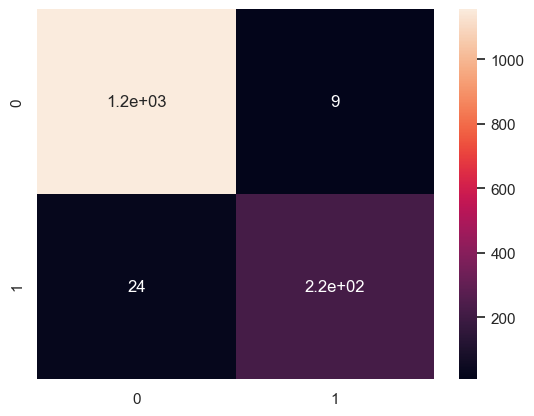

In [30]:
#Confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [31]:
#F1 score on the test set

print(f1_score(y_test,y_pred))

0.9299363057324841


#### Feature Importance
A trained XGboost model automatically calculates the feature importance of our predictive modelling problem. This lets us know which feature had more contribution to the overall prediction.

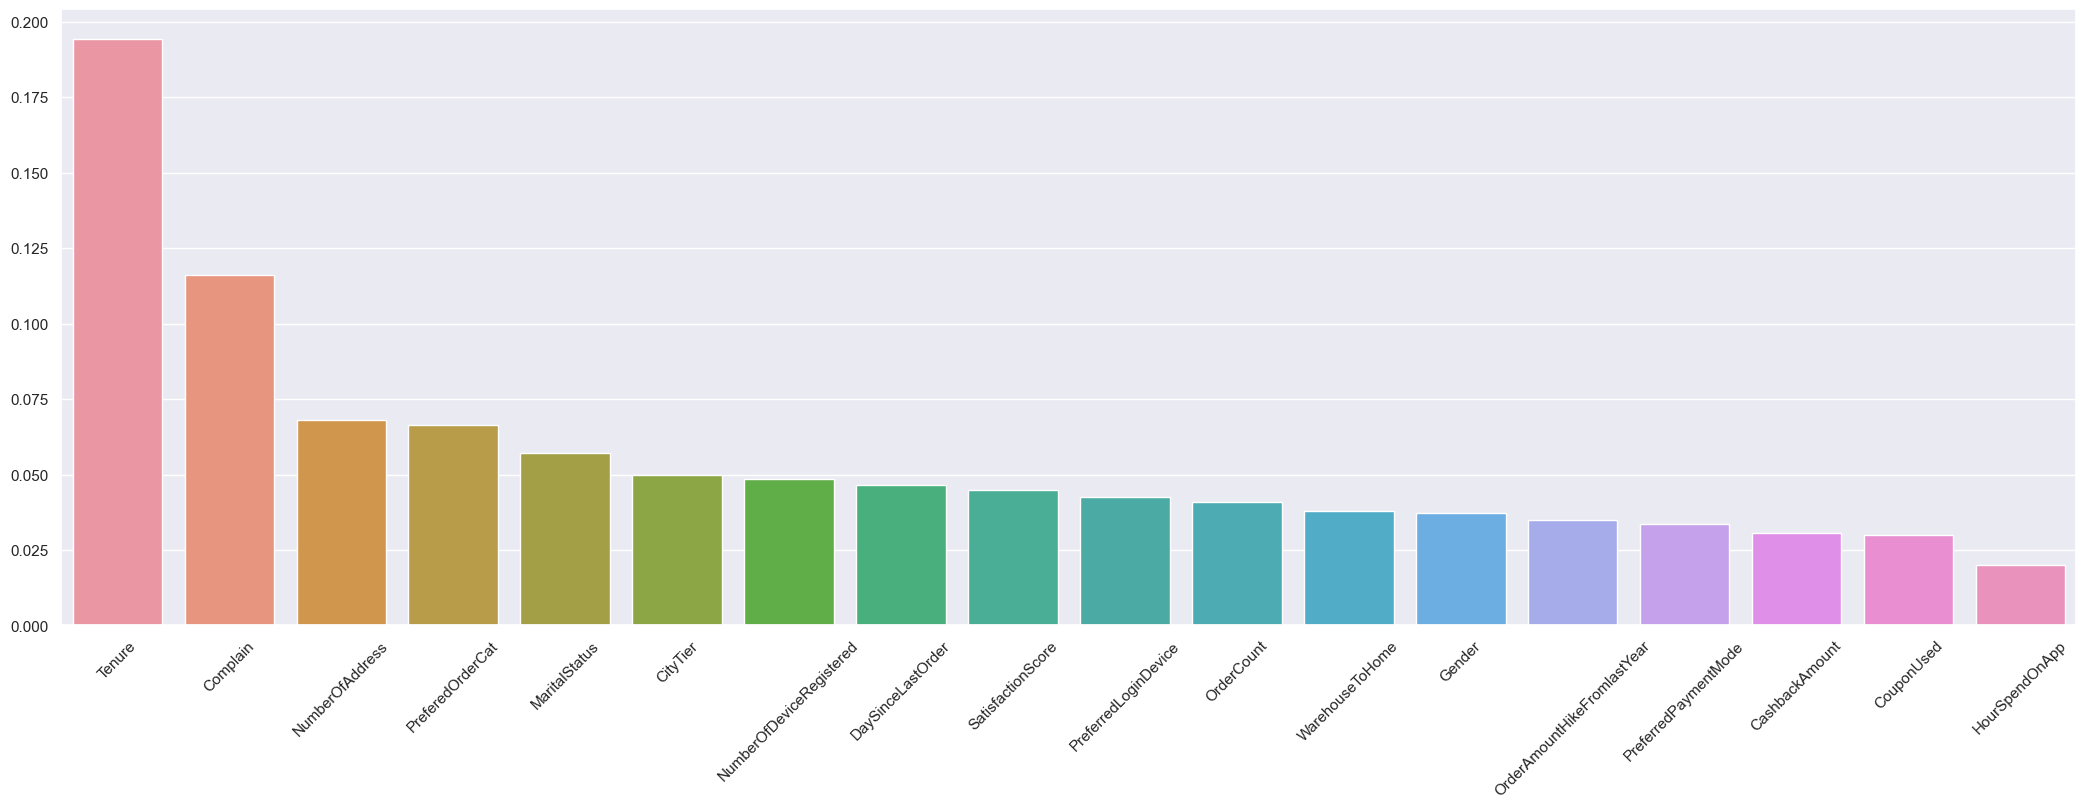

In [32]:
feature_array = grid.best_estimator_[-1].feature_importances_
importance = dict(zip(df.drop('Churn',axis=1).columns,feature_array))
importance = dict(sorted(importance.items(), key= lambda item:item[1],reverse = True) )
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x=list(importance.keys()), y=list(importance.values()))
plt.tick_params(axis='x', labelrotation=45)
plt.show()

The Tenure, which is  Customer tenure is the length of time since the beginning of the customer relationship. It is an extremely important variable in churn analysis. This feature have enourmous contribution in whole dataset. It signifies the importance of nurturing long-term relationships with customers and implementing strategies to retain them effectively.
We ca  apply some solution such as:  
- Retention Strategies: Knowing that tenure is a significant factor in churn, businesses can focus on implementing targeted retention strategies for customers at different stages of their tenure. For example, efforts to enhance customer experience and satisfaction might be particularly important during the early stages of the customer relationship.
- Lifetime Value Considerations: Understanding the impact of tenure on customer lifetime value can help prioritize resources and investments in acquiring and retaining valuable customers.